# Lab 5

Saransh Kacharia
<br>
November 16th, 2020

## Background

we are going to look at an inclusive search for the standard model Higgs boson in pp collisions at $\sqrt{s}=13$ TeV at the LHC using simulated dat. The Higgs bosons are produced with large transverse momentum (pT) and decaying to a bottom quark-antiquark pair. The Higgs candidates could be reconstructed as large-radius jets using Calorimeters. Due to large QCD backgorund containmination, the direct 5-sigma observation of this Higgs channel is not accomplished yet. We are going to use a set of training datasets to optimize event selections in order to enhance the discovery sensitivity. The optimal event selections will be applied to a selected pseudo-experiment data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
from scipy import stats

In [2]:
hf = h5py.File('higgs_100000_pt_250_500.h5', 'r')
higgsData = np.array(hf.get('higgs_100000_pt_250_500'))
hf.close()

hf = h5py.File('qcd_100000_pt_250_500.h5', 'r')
qcdData = np.array(hf.get('qcd_100000_pt_250_500'))
hf.close()

In [3]:
higgsData = pd.DataFrame(higgsData)
higgsData.columns = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']

qcdData = pd.DataFrame(qcdData)
qcdData.columns = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']

In [4]:
def compareData(key):
    mean = np.mean(higgsData[key])
    std = np.std(higgsData[key])
    print(f'Higgs Mean: {mean:.2f}, std: {std:.2f}')
    mean = np.mean(qcdData[key])
    std = np.std(qcdData[key])
    print(f'  QCD Mean: {mean:.2f}, std: {std:.2f}')

def comparePlots(key, title, log):
    
    #looping through the different subplots and the momenta from the datasets
    plt.title(f'{title} distrubution')
    plt.hist(higgsData[key], bins=75, alpha=0.5, density=True, label='Higgs')
    plt.hist(qcdData[key], bins=75, alpha=0.5, density=True, label='QCD')
    plt.legend()
    plt.xlabel(f'{key}')
    plt.ylabel('Density')
    if log:
        plt.yscale('log')
    plt.show()

Transverse momentum in Higgs and QCD 

Higgs Mean: 447.39, std: 44.77
  QCD Mean: 445.71, std: 34.82


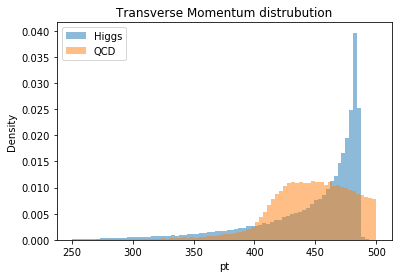

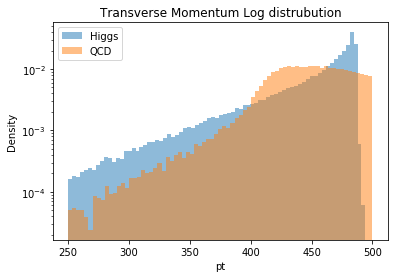

In [5]:
compareData('pt')
comparePlots('pt', 'Transverse Momentum', False)
comparePlots('pt', 'Transverse Momentum Log', True)

Pseudorapidity in Higgs and QCD

Higgs Mean: -0.00, std: 0.90
  QCD Mean: -0.00, std: 1.22


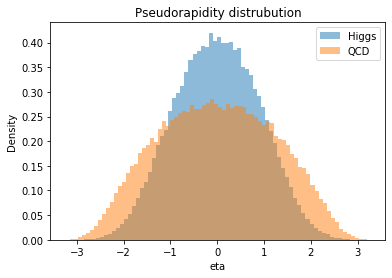

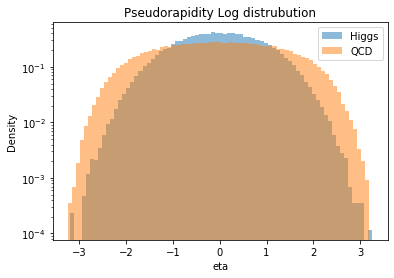

In [6]:
compareData('eta')
comparePlots('eta', 'Pseudorapidity', False)
comparePlots('eta', 'Pseudorapidity Log', True)

Other varliables in the data compared

phi:
Higgs Mean: 0.00, std: 1.81
  QCD Mean: -0.00, std: 1.81


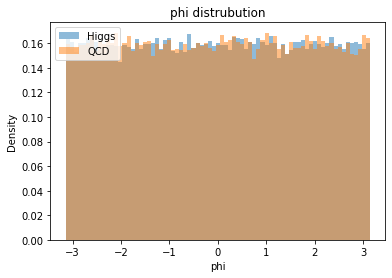


mass:
Higgs Mean: 114.89, std: 25.35
  QCD Mean: 97.74, std: 43.49


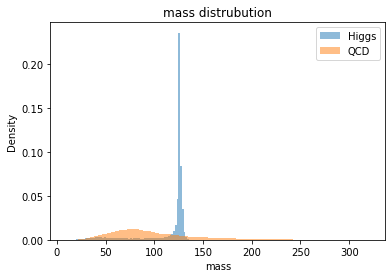


ee2:
Higgs Mean: 0.13, std: 0.04
  QCD Mean: 0.09, std: 0.07


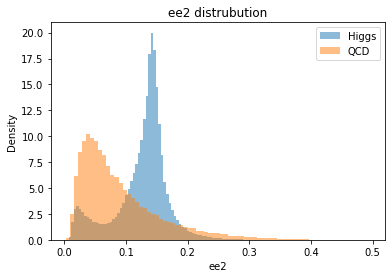


ee3:
Higgs Mean: 0.00, std: 0.00
  QCD Mean: 0.00, std: 0.01


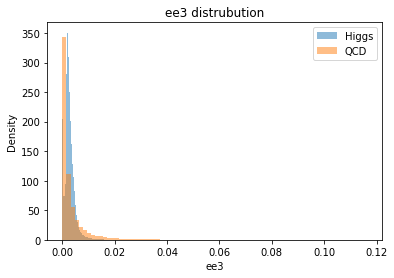


d2:
Higgs Mean: 1.97, std: 2.50
  QCD Mean: 5.21, std: 4.29


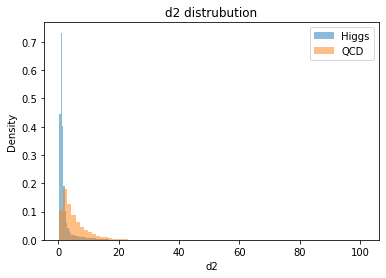


angularity:
Higgs Mean: 0.00, std: 0.00
  QCD Mean: 0.00, std: 0.01


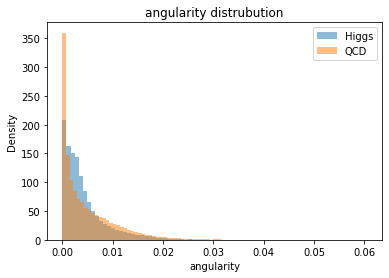


t1:
Higgs Mean: 0.90, std: 0.22
  QCD Mean: 0.91, std: 0.16


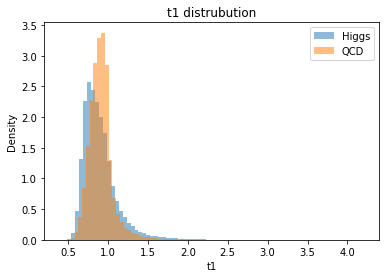


t2:
Higgs Mean: 0.31, std: 0.19
  QCD Mean: 0.59, std: 0.19


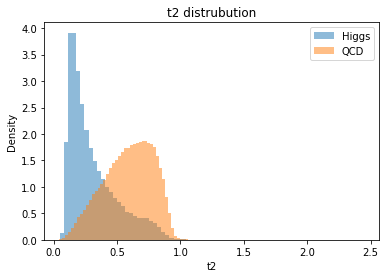


t3:
Higgs Mean: 0.23, std: 0.14
  QCD Mean: 0.48, std: 0.17


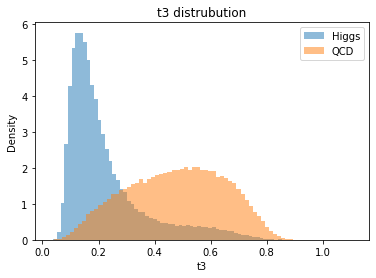


t21:
Higgs Mean: 0.35, std: 0.20
  QCD Mean: 0.65, std: 0.19


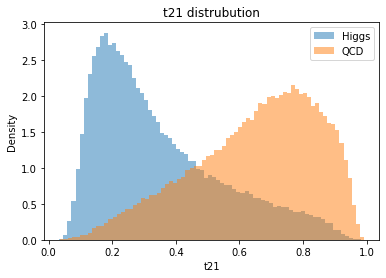


t32:
Higgs Mean: 0.76, std: 0.13
  QCD Mean: 0.81, std: 0.10


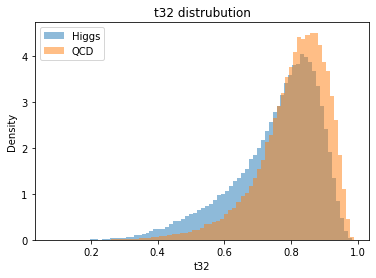


KtDeltaR:
Higgs Mean: 0.53, std: 0.21
  QCD Mean: 0.32, std: 0.26


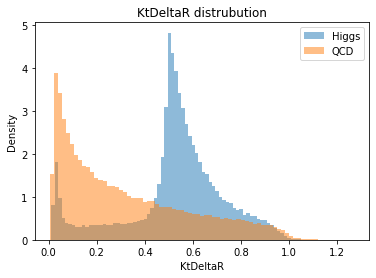

In [7]:
for i in range(2, 14):
    key = higgsData.columns[i]
    print(f'{key}:')
    compareData(key)
    comparePlots(key, key, False)
    print('')

We can see clear higgs spikes in mass, ee2, t2, t3, t21, and KtDeltaR. We can use this data to determine the sigma certainty of a classification.